<a href="https://colab.research.google.com/github/miramartha/customer-shopping-analysis/blob/main/customer_shopping_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -------------------------
# 0. Setup: import libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting defaults (tidy)
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style('whitegrid')

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/miramartha/customer-shopping-analysis/main/shopping_trends.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()

Shape: (3900, 19)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
# -------------------------
# 2. Quick overview & cleaning helpers
# -------------------------
# Show columns & types
print(df.columns.tolist())
display(df.info())
display(df.describe(include='all').T)

# Standardize column names (lowercase, replace spaces)
df.columns = [c.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for c in df.columns]
df.head()


['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
# -------------------------
# 3. Fix data types & numeric conversions
# -------------------------
# purchase_amount_usd -> numeric
col_amt = [c for c in df.columns if 'purchase' in c and 'amount' in c or 'amount' in c]
col_amt
# try common names
if 'purchase_amount_usd' in df.columns:
    df['purchase_amount_usd'] = pd.to_numeric(df['purchase_amount_usd'], errors='coerce')
elif 'purchase_amount' in df.columns:
    df['purchase_amount'] = pd.to_numeric(df['purchase_amount'], errors='coerce')

# review_rating -> numeric
if 'review_rating' in df.columns:
    df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')

# previous_purchases -> numeric (if string)
if 'previous_purchases' in df.columns:
    df['previous_purchases'] = pd.to_numeric(df['previous_purchases'], errors='coerce')

# show nulls
display(df.isna().sum().sort_values(ascending=False).head(20))


,0
customer_id,0
age,0
gender,0
item_purchased,0
category,0
purchase_amount_usd,0
location,0
size,0
color,0
season,0


In [9]:
# -------------------------
# 4. Basic cleaning choices
# -------------------------
# Drop rows with missing critical values (purchase amount or item purchased)
critical_cols = []
if 'purchase_amount_usd' in df.columns:
    critical_cols.append('purchase_amount_usd')
if 'item_purchased' in df.columns:
    critical_cols.append('item_purchased')

# drop only if many rows missing that critical columns, otherwise keep and note
df_clean = df.copy()
df_clean = df_clean.dropna(subset=[c for c in critical_cols if c in df_clean.columns]).reset_index(drop=True)
print("After dropping critical-nulls shape:", df_clean.shape)


After dropping critical-nulls shape: (3900, 19)


In [10]:
# -------------------------
# 5. Feature engineering (columns that help analysis)
# -------------------------
# Age group
if 'age' in df_clean.columns:
    bins = [0,17,24,34,44,54,64,120]
    labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
    df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=True)

# Has discount flag
for col in df_clean.columns:
    if 'discount' in col:
        df_clean['discount_flag'] = df_clean[col].apply(lambda x: 1 if str(x).strip().lower() in ['yes','y', 'true', '1'] else 0)

# Subscription status binary
if 'subscription_status' in df_clean.columns:
    df_clean['subscription_flag'] = df_clean['subscription_status'].apply(lambda x: 1 if str(x).strip().lower() in ['yes','true','y'] else 0)

df_clean.head()


,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,...,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases,age_group,discount_flag,subscription_flag
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,55-64,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-24,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,45-54,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-24,1,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,45-54,1,1


Total sales (sum): 233081
Average per transaction: 59.76435897435898


,purchase_amount_usd
count,3900.000000
mean,59.764359
std,23.685392
min,20.000000
25%,39.000000
50%,60.000000
75%,81.000000
max,100.000000


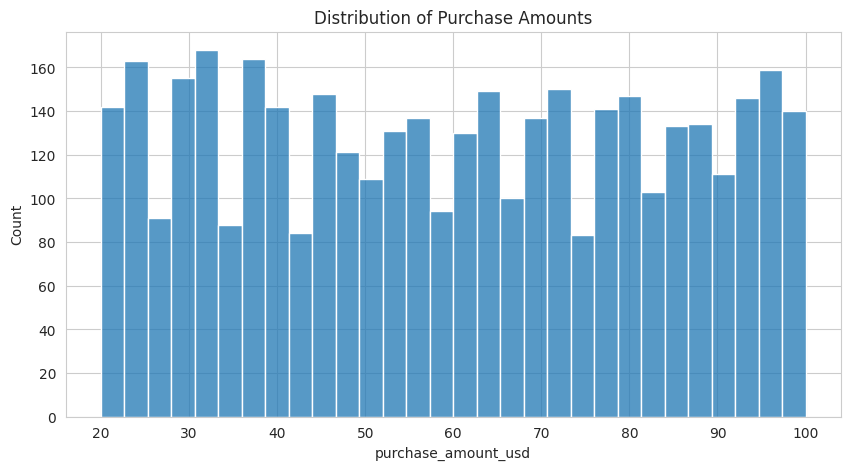

In [11]:
# -------------------------
# 6. Quick EDA: overall sales & distribution
# -------------------------
amt_col = 'purchase_amount_usd' if 'purchase_amount_usd' in df_clean.columns else ('purchase_amount' if 'purchase_amount' in df_clean.columns else None)
if amt_col:
    print("Total sales (sum):", df_clean[amt_col].sum())
    print("Average per transaction:", df_clean[amt_col].mean())
    display(df_clean[amt_col].describe())
    sns.histplot(df_clean[amt_col].dropna(), kde=False, bins=30)
    plt.title('Distribution of Purchase Amounts')
    plt.show()


,count
item_purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


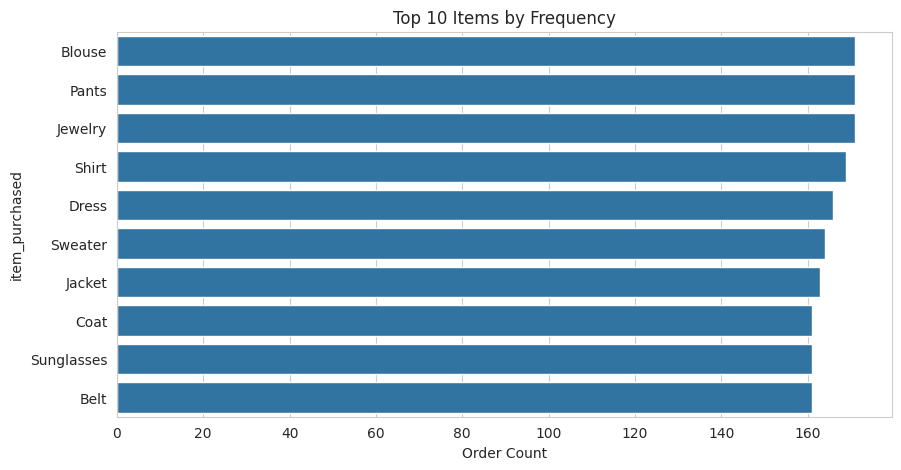

,category,sum,count,mean
0,Clothing,104264,1737,60.025331
1,Accessories,74200,1240,59.838710
2,Footwear,36093,599,60.255426
3,Outerwear,18524,324,57.172840


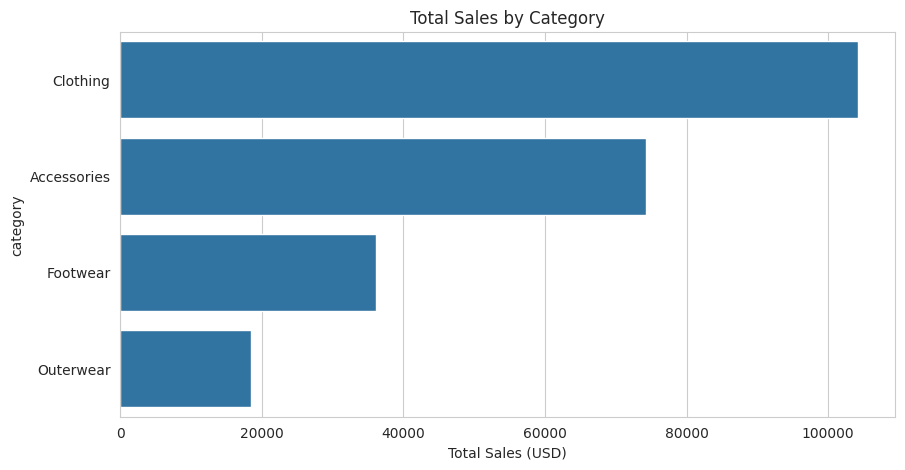

In [12]:
# -------------------------
# 7. Top products & category analysis
# -------------------------
if 'item_purchased' in df_clean.columns:
    top_items = df_clean['item_purchased'].value_counts().head(10)
    display(top_items)
    sns.barplot(y=top_items.index, x=top_items.values)
    plt.title('Top 10 Items by Frequency')
    plt.xlabel('Order Count')
    plt.show()

if 'category' in df_clean.columns and amt_col:
    cat_sales = df_clean.groupby('category')[amt_col].agg(['sum','count','mean']).sort_values('sum', ascending=False).reset_index()
    display(cat_sales)
    sns.barplot(data=cat_sales, x='sum', y='category')
    plt.title('Total Sales by Category')
    plt.xlabel('Total Sales (USD)')
    plt.show()


,gender,mean,count
0,Female,60.249199,1248
1,Male,59.536199,2652


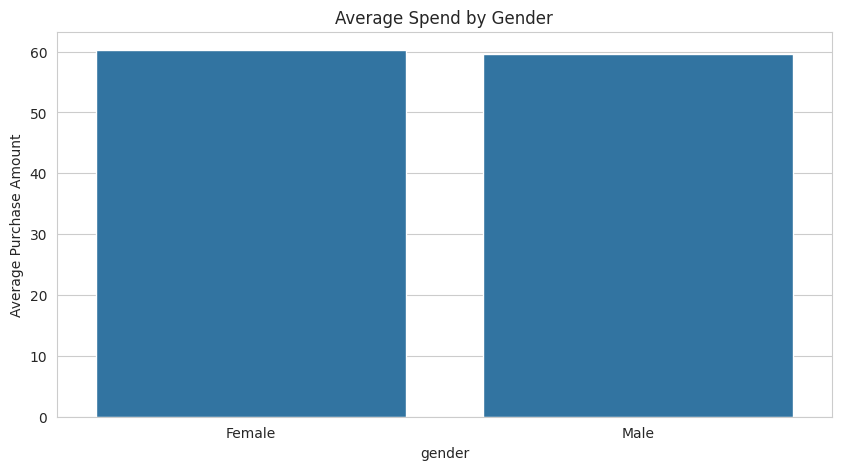

/tmp/ipython-input-3704856090.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df_clean.groupby('age_group')[amt_col].agg(['mean','count']).reset_index()


,age_group,mean,count
0,<18,NaN,0
1,18-24,60.201646,486
2,25-34,60.132450,755
3,35-44,59.620027,729
4,45-54,60.332447,752
5,55-64,58.716378,751
6,65+,59.704918,427


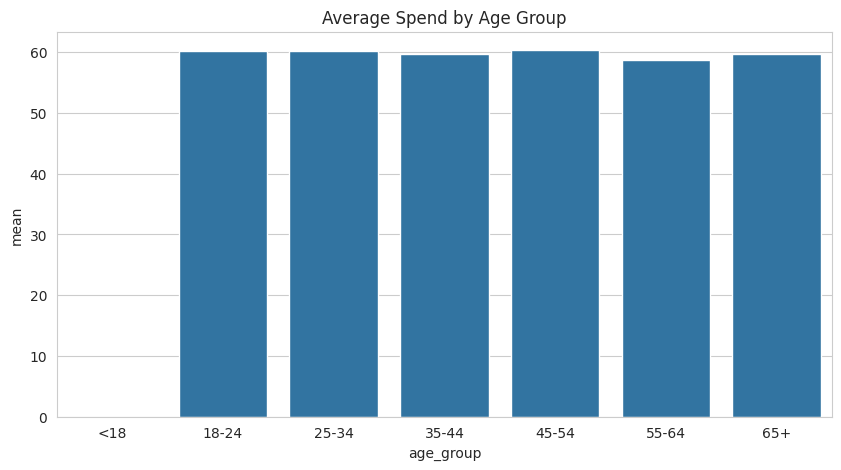

In [13]:
# -------------------------
# 8. Demographics: gender, age_group, location
# -------------------------
# Gender vs avg spend
if 'gender' in df_clean.columns and amt_col:
    g = df_clean.groupby('gender')[amt_col].agg(['mean','count']).reset_index().sort_values('mean', ascending=False)
    display(g)
    sns.barplot(data=g, x='gender', y='mean')
    plt.title('Average Spend by Gender')
    plt.ylabel('Average Purchase Amount')
    plt.show()

# Age group vs spend (if exists)
if 'age_group' in df_clean.columns and amt_col:
    a = df_clean.groupby('age_group')[amt_col].agg(['mean','count']).reset_index()
    display(a)
    sns.barplot(data=a, x='age_group', y='mean')
    plt.title('Average Spend by Age Group')
    plt.show()


,location,sum,count
25,Montana,5784,96
12,Illinois,5617,92
4,California,5605,95
11,Idaho,5587,93
27,Nevada,5514,87
0,Alabama,5261,89
31,New York,5257,87
33,North Dakota,5220,83
47,West Virginia,5174,81
26,Nebraska,5172,87


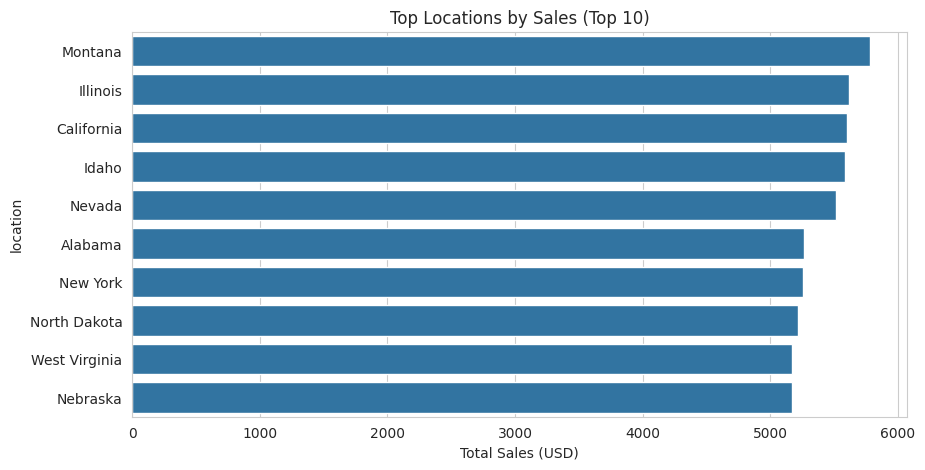

,shipping_type,count
0,Free Shipping,675
1,Standard,654
2,Store Pickup,650
3,Next Day Air,648
4,Express,646
5,2-Day Shipping,627


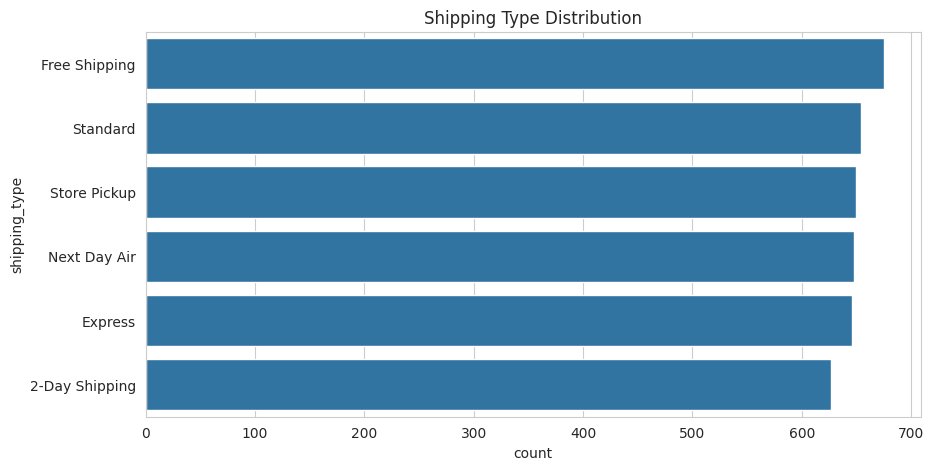

In [14]:
# -------------------------
# 9. Location & shipping type analysis
# -------------------------
if 'location' in df_clean.columns and amt_col:
    loc = df_clean.groupby('location')[amt_col].agg(['sum','count']).reset_index().sort_values('sum', ascending=False).head(10)
    display(loc)
    sns.barplot(data=loc, x='sum', y='location')
    plt.title('Top Locations by Sales (Top 10)')
    plt.xlabel('Total Sales (USD)')
    plt.show()

if 'shipping_type' in df_clean.columns:
    st = df_clean['shipping_type'].value_counts().reset_index()
    st.columns = ['shipping_type', 'count']
    display(st)
    sns.barplot(data=st, x='count', y='shipping_type')
    plt.title('Shipping Type Distribution')
    plt.show()


In [15]:
# -------------------------
# 10. Effects of discounts, promo, subscription
# -------------------------
# Discount flag effect on avg spend
if 'discount_flag' in df_clean.columns and amt_col:
    dd = df_clean.groupby('discount_flag')[amt_col].agg(['mean','count']).reset_index()
    display(dd)

# Subscription effect
if 'subscription_flag' in df_clean.columns and amt_col:
    sd = df_clean.groupby('subscription_flag')[amt_col].agg(['mean','count']).reset_index()
    display(sd)


,discount_flag,mean,count
0,0,60.130454,2223
1,1,59.279070,1677


,subscription_flag,mean,count
0,0,59.865121,2847
1,1,59.491928,1053


,previous_purchases,review_rating,purchase_amount_usd
previous_purchases,1.000000,0.004229,0.008063
review_rating,0.004229,1.000000,0.030776
purchase_amount_usd,0.008063,0.030776,1.000000


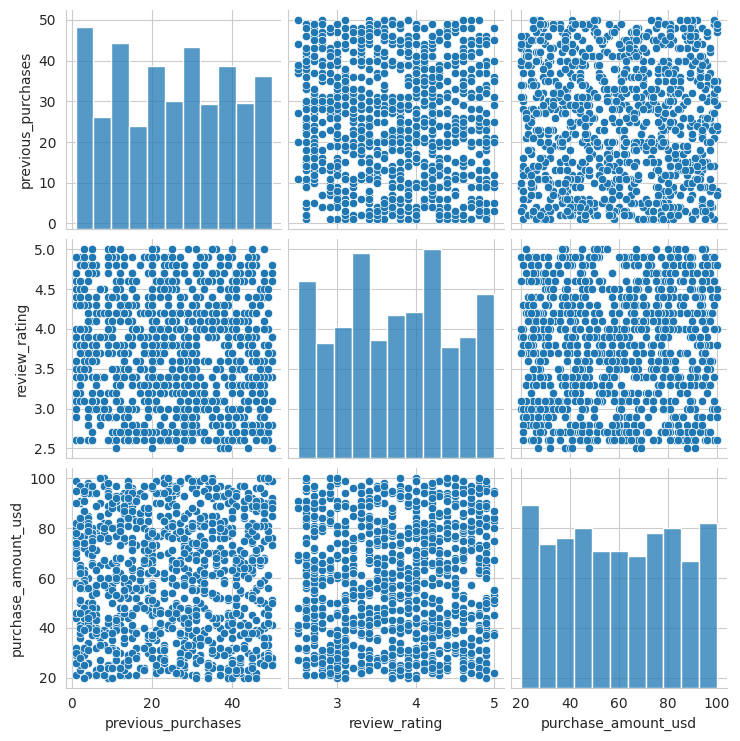

In [16]:
# -------------------------
# 11. Correlation: previous purchases vs amount, review_rating vs amount
# -------------------------
corr_cols = []
if 'previous_purchases' in df_clean.columns:
    corr_cols.append('previous_purchases')
if 'review_rating' in df_clean.columns:
    corr_cols.append('review_rating')
if amt_col:
    corr_cols.append(amt_col)

if len(corr_cols) >= 2:
    display(df_clean[corr_cols].corr())
    sns.pairplot(df_clean[corr_cols].dropna().sample(min(1000, len(df_clean))))
    plt.show()


In [17]:
# -------------------------
# 12. Simple customer segmentation idea (RFM-ish proxy)
# -------------------------
# Note: without last_purchase_date we cannot compute recency. We'll do frequency + monetary + previous_purchases
if 'frequency_of_purchases' in df_clean.columns and amt_col:
    # convert frequency category to ordinal approx
    freq_map = {
        'Daily': 365, 'Weekly': 52, 'Fortnightly': 26, 'Monthly': 12, 'Quarterly': 4, 'Semi-Annually': 2, 'Annually':1
    }
    df_clean['frequency_numeric'] = df_clean['frequency_of_purchases'].map(lambda x: freq_map.get(str(x).strip(), np.nan))
    seg = df_clean.groupby('customer_id').agg({
        amt_col: 'sum',
        'frequency_numeric': 'mean',
        'previous_purchases': 'mean'
    }).rename(columns={amt_col:'total_spent'}).reset_index()
    display(seg.head())


,customer_id,total_spent,frequency_numeric,previous_purchases
0,1,53,26.0,14.0
1,2,64,26.0,2.0
2,3,73,52.0,23.0
3,4,90,52.0,49.0
4,5,49,1.0,31.0


In [18]:
# -------------------------
# 13. Save cleaned sample and summary outputs (optional)
# -------------------------
# Save a sample cleaned CSV to download and upload to repo if needed
df_clean.head(100).to_csv('shopping_clean_sample.csv', index=False)
print("Saved sample cleaned file: shopping_clean_sample.csv")


Saved sample cleaned file: shopping_clean_sample.csv
